In [2]:
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn import datasets
datasets = datasets.load_diabetes()

In [7]:
### Load the data
df = pd.read_csv("diabetes.csv")

### Check if the data is properly loaded
print("Size of the dataset:", df.shape)
df.head()

Size of the dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
### List the columns along with its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
### Summary of statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
### Display the number of zero values per columns 
print("---Count zero values per column---")

for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI"]:
    print("{}: {}".format( col, df[col].value_counts()[0] ))
    
    
### Print the percentage of rows with zero values
print("\n---Rows with zero values in %---")

print("% of rows with zero values in all columns listed above:", 
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) | 
          (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) * 100)

print("% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI':", 
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) | 
          (df["BMI"]==0)].shape[0] / df.shape[0]) * 100)

---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zero values in %---
% of rows with zero values in all columns listed above: 30.729166666666668
% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI': 5.729166666666666


In [13]:
### Determine correlation between variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

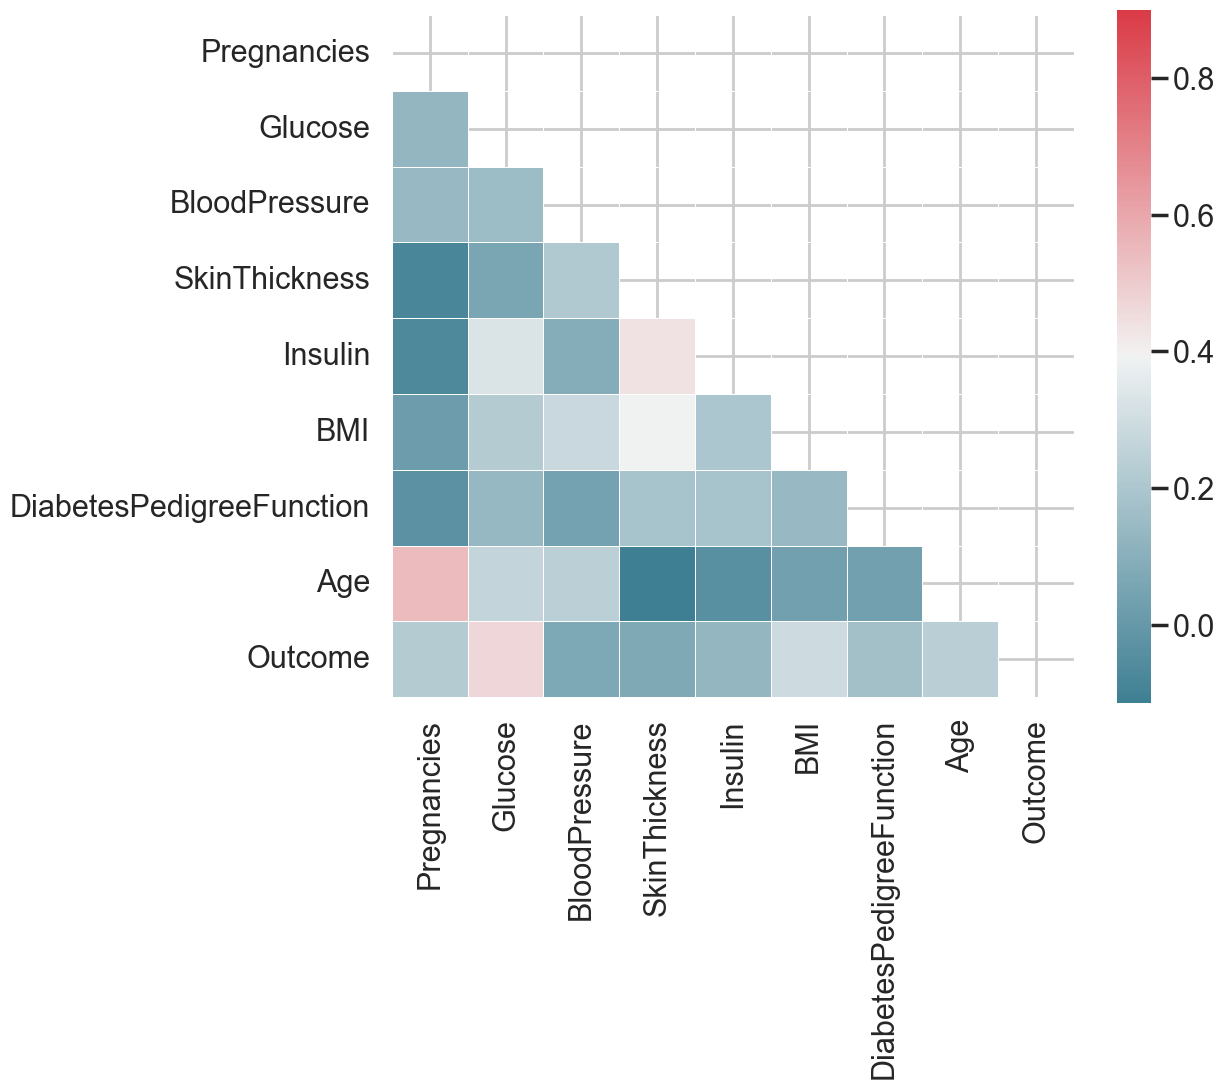

In [14]:
### Visualize Correlation

## Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

----- Outcome vs Pregnancies-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


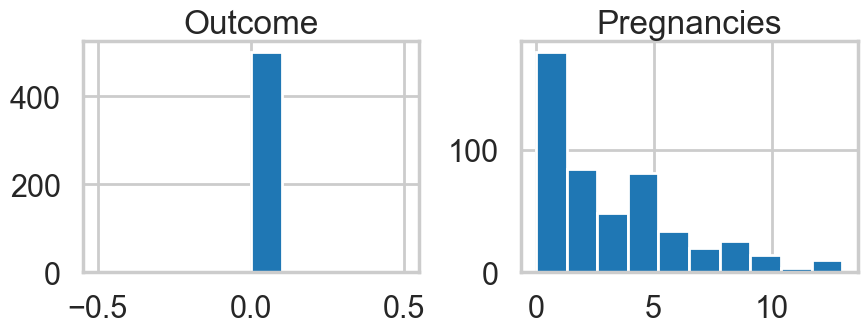

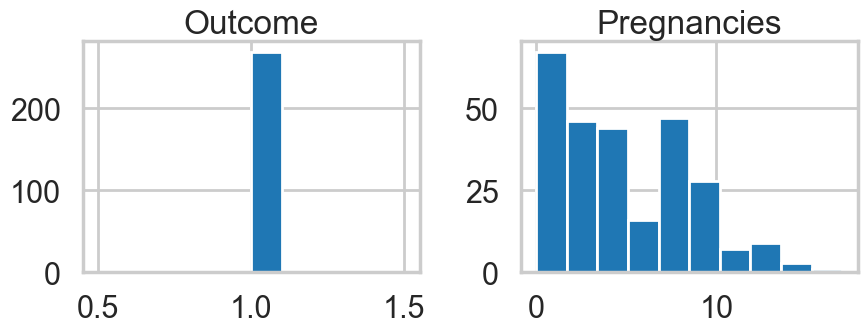

In [15]:
### Function to plot histogram
def histplt(col):
    print("----- Outcome vs {}-----".format(col))
    print(df[["Outcome", col]].groupby("Outcome").hist(figsize=(10,3)))
    
### Plot histogram for Outcome vs Pregnancies
histplt("Pregnancies")

----- Outcome vs Glucose-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


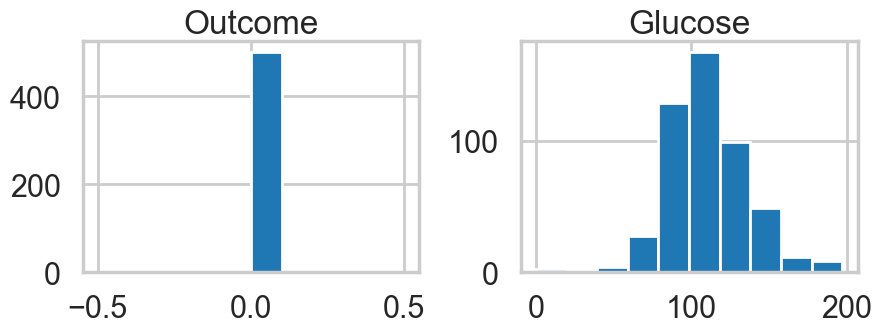

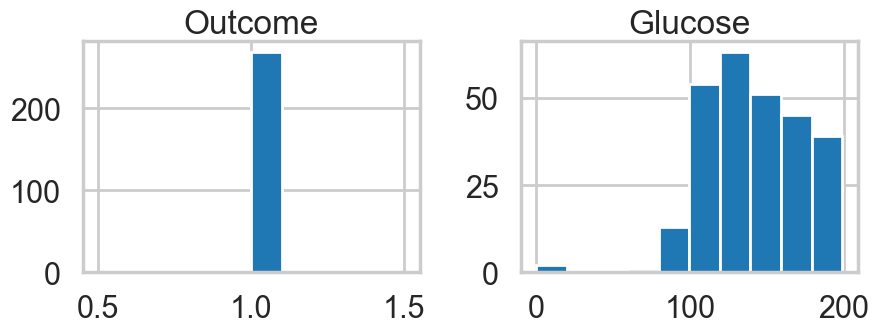

In [16]:
### Plot histogram for Outcome vs Glucose
histplt("Glucose")

----- Outcome vs BloodPressure-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


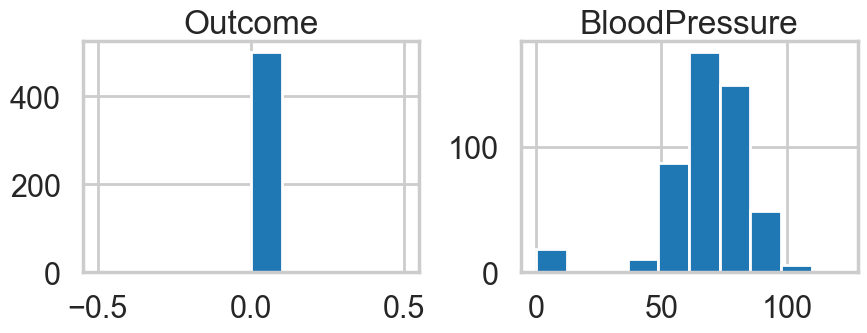

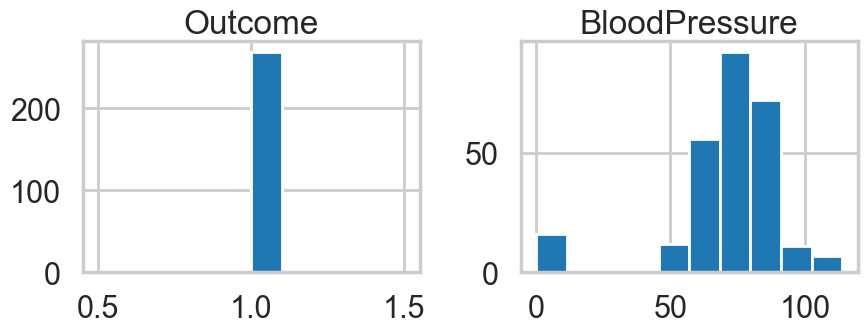

In [17]:
### Plot histogram for Outcome vs BloodPressure
histplt("BloodPressure")

----- Outcome vs SkinThickness-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


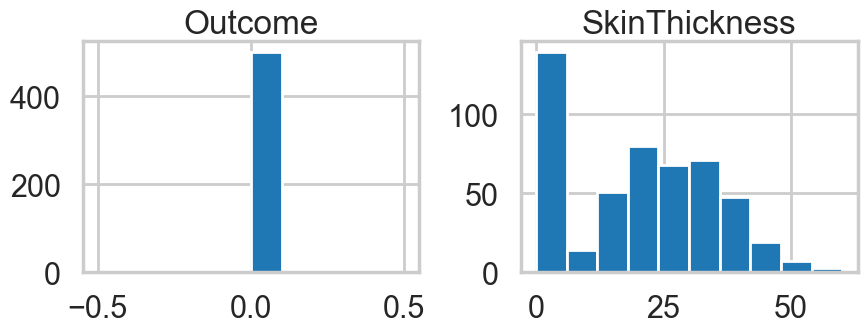

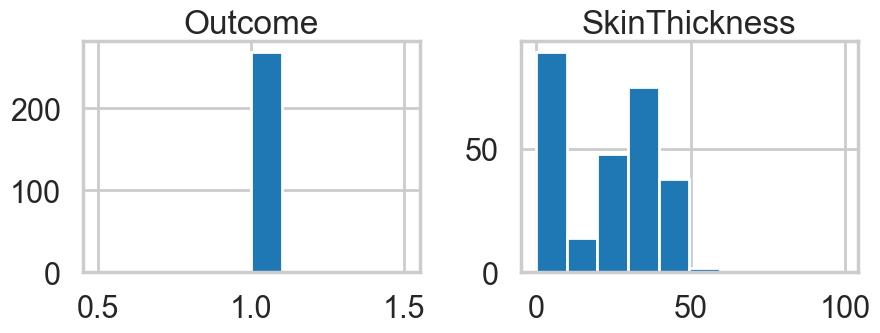

In [18]:
### Plot histogram for Outcome vs SkinThickness
histplt("SkinThickness")

----- Outcome vs Insulin-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


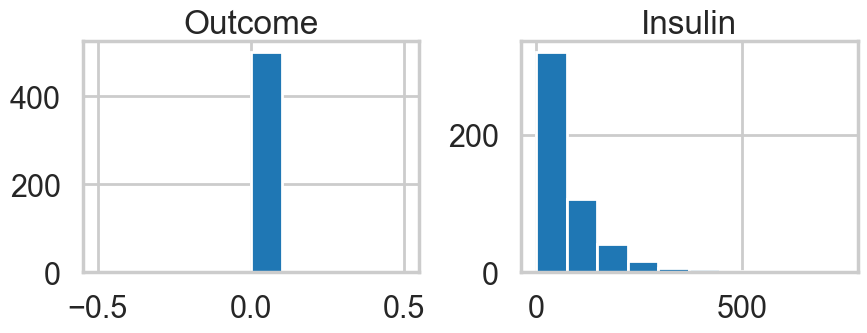

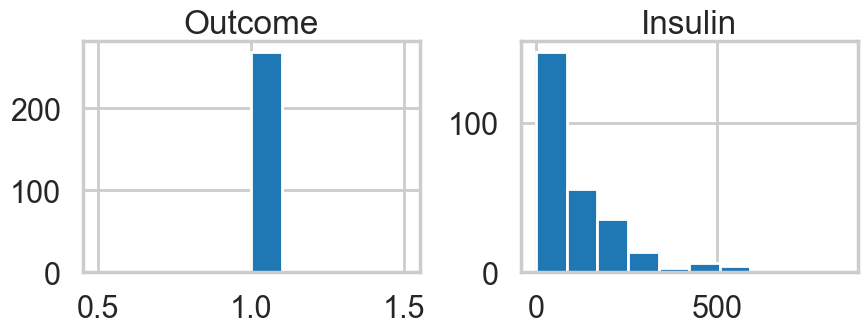

In [19]:
### Plot histogram for Outcome vs Insulin
histplt("Insulin")

----- Outcome vs BMI-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


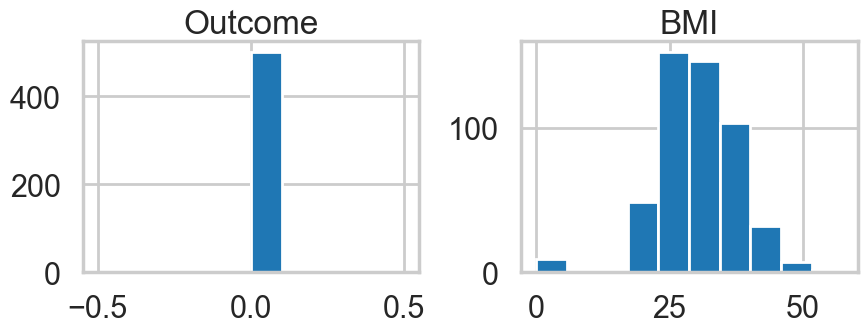

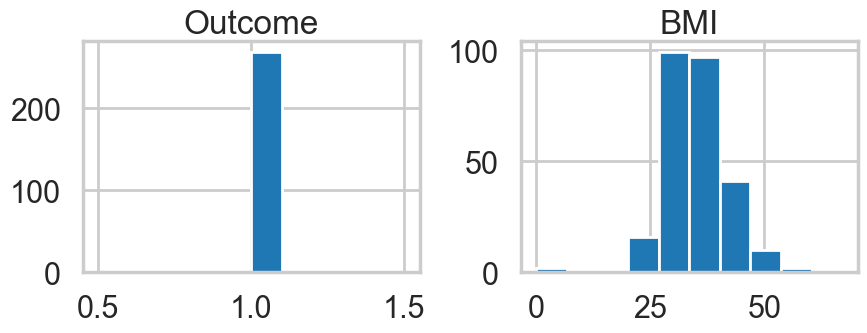

In [20]:
### Plot histogram for Outcome vs BMI
histplt("BMI")

----- Outcome vs DiabetesPedigreeFunction-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


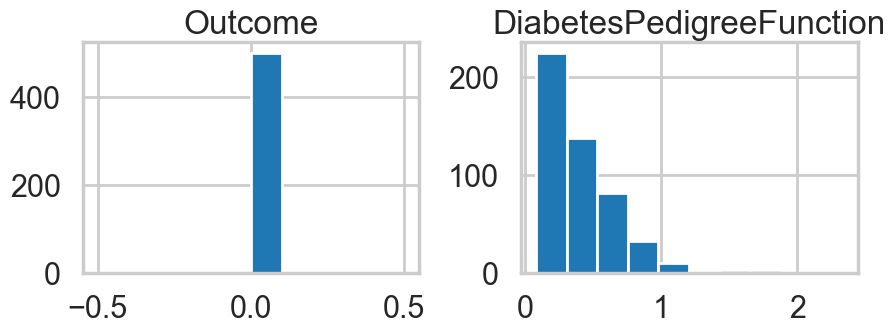

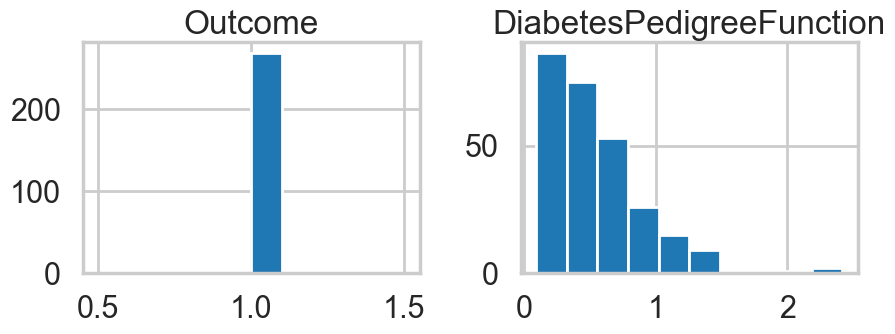

In [21]:
### Plot histogram for Outcome vs DiabetesPedigreeFunction
histplt("DiabetesPedigreeFunction")

----- Outcome vs Age-----
Outcome
0    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object


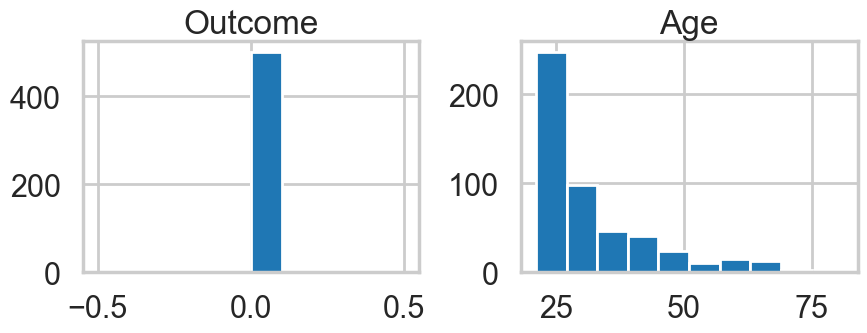

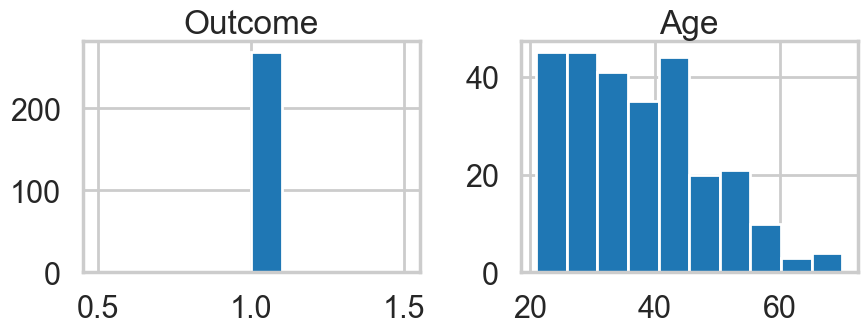

In [22]:
### Plot histogram for Outcome vs Age
histplt("Age")

In [23]:
### Check how balanced / imbalanced the data is
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
### Create new dataframe wherein the unwanted rows are not included
df_rem = df[ (df["Glucose"]!=0) & (df["BloodPressure"]!=0) & (df["BMI"]!=0) ]

### Check the new dataframe
print("Size of dataframe:", df_rem.shape)
df_rem.head()

Size of dataframe: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
### Check minimum values of the new dataframe
df_rem.describe().loc["min"]

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                0.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

In [27]:
### Separate rows that have zero value in SkinThickness from the rows that have value > 0
df_impute = df_rem[df_rem["SkinThickness"]!=0]
df_0 = df_rem[df_rem["SkinThickness"]==0]

### Use Linear Regression for imputation
## Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

## Fit the dataframe with SkinThickness > 0 on linreg
linreg.fit(df_impute.drop(["SkinThickness", "Outcome"], axis=1), df_impute["SkinThickness"])

## Get the new values of SkinThickness
df_0["SkinThickness"] = linreg.predict(df_0.drop(["SkinThickness","Outcome"], axis=1))



In [9]:
### Create new dataframe wherein the unwanted rows are not included
df_rem = df[ (df["Glucose"]!=0) & (df["BloodPressure"]!=0) & (df["BMI"]!=0) ]

### Check the new dataframe
print("Size of dataframe:", df_rem.shape)
df_rem.head()

Size of dataframe: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
### Seaprate the predictors from the target variable
X = df_impute.drop(["Outcome"], axis=1)
y = df_impute["Outcome"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))

Size of x (predictors):	(532, 8)
Size of y (target):	(532,)


In [34]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Size of x_train: (372, 8) 	 Size of x_test: (160, 8) 
Size of y_train: (372,) 	 Size of y_test: (160,)


In [35]:
print(y_train.value_counts(), '\n', y_test.value_counts())

Outcome
0    248
1    124
Name: count, dtype: int64 
 Outcome
0    107
1     53
Name: count, dtype: int64


In [36]:
### Instantiate the Standard Scaler
scaler = StandardScaler()

### Fit the scaler to the training set
scaler.fit(X_train)

### Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)

In [37]:
### Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [38]:
### Initialized for easy plotting of confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

In [39]:
### Instantiate the Algorithm 
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [41]:
### Predict on the test set
logreg_pred = logreg.predict(X_test_scaled)

In [42]:
### Get performance metrics
logreg_score = metrics.accuracy_score(y_test, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test, logreg_pred)))
print("Accuracy score:", logreg_score)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.82      0.62      0.71        53

    accuracy                           0.83       160
   macro avg       0.83      0.78      0.80       160
weighted avg       0.83      0.83      0.82       160

Accuracy score: 83.125


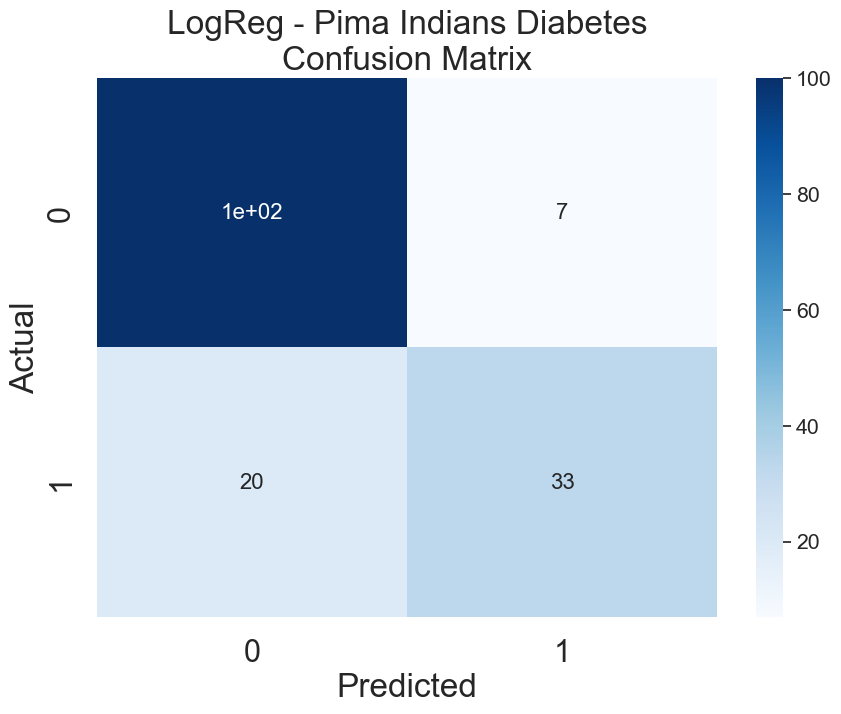

In [43]:
### Plot the confusion matrix
confmatrix(logreg_pred, "LogReg - Pima Indians Diabetes\nConfusion Matrix")

In [44]:
### Perform 10-fold cross-validation
logreg_cv = np.mean(cross_val_score(logreg, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", logreg_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 77.05800139762405


In [46]:
### Instantiate the Algorithm 
gnb = GaussianNB()

### Train the model
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [47]:
### Predict on the Test Set
gnb_pred = gnb.predict(X_test_scaled)

In [48]:
### Get performance metrics
gnb_score = metrics.accuracy_score(y_test, gnb_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(gnb, metrics.classification_report(y_test, gnb_pred)))
print("Accuracy score:", gnb_score)

Classification report for GaussianNB():
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.70      0.66      0.68        53

    accuracy                           0.79       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.79      0.79      0.79       160

Accuracy score: 79.375


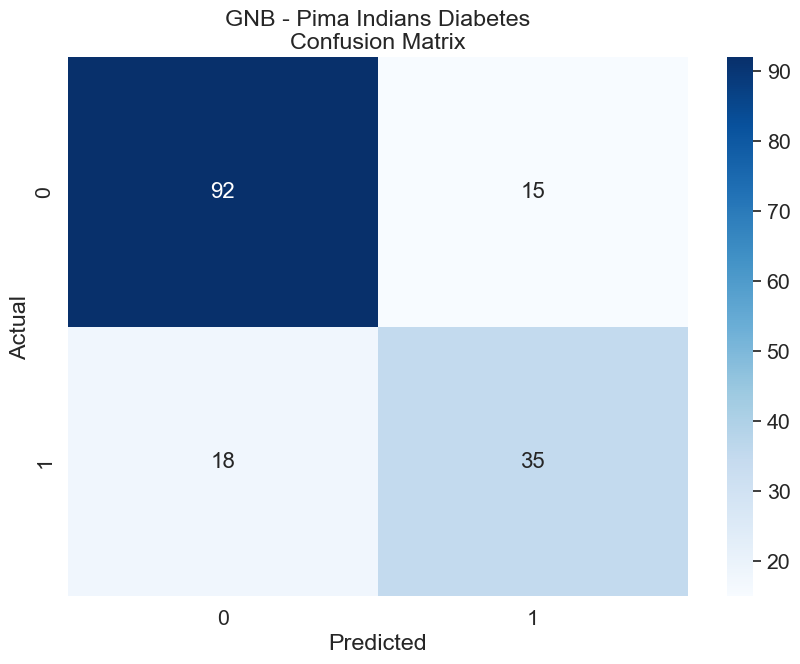

In [49]:
### Plot the confusion matrix
confmatrix(gnb_pred, "GNB - Pima Indians Diabetes\nConfusion Matrix")

In [50]:
### Perform cross-validation then get the mean
gnb_cv = np.mean(cross_val_score(gnb, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", gnb_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 76.3067784765898


In [54]:
### Instantiate algorithm
rf = RandomForestClassifier()

### Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [56]:
### Predict on the test set
rf_pred = rf.predict(X_test_scaled)

In [57]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", rf_score)

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.79      0.64      0.71        53

    accuracy                           0.82       160
   macro avg       0.81      0.78      0.79       160
weighted avg       0.82      0.82      0.82       160

Accuracy score: 82.5


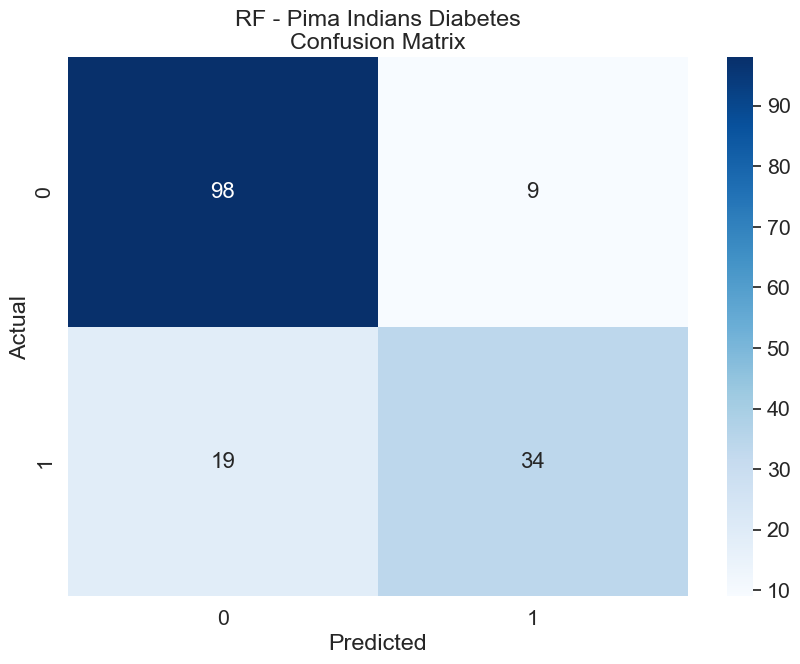

In [58]:
### Plot the confusion matrix
confmatrix(rf_pred, "RF - Pima Indians Diabetes\nConfusion Matrix")

In [59]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", rf_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 78.74213836477988


In [60]:
df_results = pd.DataFrame.from_dict({
    'Accuracy Score':{'Logistic Regression':logreg_score, 'Gaussian Naive Bayes':gnb_score, 'Random Forest':rf_score},
    'Cross-Validation Score':{'Logistic Regression':logreg_cv, 'Gaussian Naive Bayes':gnb_cv, 'Random Forest':rf_cv}
    })
df_results

,Accuracy Score,Cross-Validation Score
Logistic Regression,83.125,77.058001
Gaussian Naive Bayes,79.375,76.306778
Random Forest,82.500,78.742138
